<a href="https://colab.research.google.com/github/NOORAHMED3676/My_projects/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 🏦 Logistic Regression for Bank Loan Approval Analysis

**🎯 Objective**:
With ample financial data available, the Banking Institute aims to understand key determinants in extending credit lines. This analysis assists the Bank in grasping significant loan approval factors and their interplay. The ultimate goal is to devise a model predicting if a credit line should be extended based on individual attributes.

**📊 Project Breakdown**:
This analytical journey encompasses the following methodologies and techniques:

1. **🔍 Exploratory Data Analysis (EDA)**: Comprehensive exploration to identify patterns, correlations, and outliers.
2. **🛠 Feature Engineering**: Innovating from the existing dataset to enhance model classification.
3. **📐 Logistic Regression Implementation** : Constructing a Logistic Regression model using Sklearn.
4. **📝 Classification Report**: Detailed metrics including accuracy, precision, recall, and F1-score.
5. **📉 ROC-AUC Curve Analysis**: Evaluating class distinction ability.
6. **📊 Precision-Recall Curve**: Unpacking the precision-recall trade-off for varied threshold values.

### Importing Libraries

In [4]:
# Scientific libraries
import numpy as np
import pandas as pd
import scipy
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Helper libraries (Not that important, can be skipped)
import warnings
warnings.filterwarnings('ignore')

# Visual setup (With the figure format set as retina, high resolution plots can be generated)
%config InlineBackend.figure_format = 'retina'

# Pandas options (If you have 2 to 3 lines of code in a single block, it will
# show the output of all the lines of codes not just the output of last line of code)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Table styles (This is just for making the df table look decorative, not important)
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80"), ("text-transform", "capitalize")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

In [5]:
df = pd.read_csv('/content/logistic_regression.csv')
display(df.head())
df_copy = pd.read_csv('/content/logistic_regression.csv')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Understanding the Dataset
**Data dictionary:**
* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

### Data Exploration and Wrangling

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
# Shape of the dataset -
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  396030
No. of columns:  27


In [8]:
# Distribution of Target labels
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Fully Paid,0.803871
Charged Off,0.196129


* There is a good amount of imabalance in the target outcomes, this implies accuracy metric will not be a good option to evaluate our model.

* First let I will fit a model with the same imbalanced data and check for evaulation metrics then after that I will fit model on the dataset to which I am going to oversample it for reducing the imbalance of the minority class.

In [9]:
# Correlation Matrix

df.select_dtypes(include='number').corr(method='spearman')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.131432,0.968334,0.488566,0.053118,0.215244,-0.100435,0.469646,0.104708,0.237115,0.231240,-0.108661
int_rate,0.131432,1.000000,0.137293,-0.096648,0.172123,0.004181,0.072204,0.005948,0.303990,-0.050880,-0.102962,0.060848
installment,0.968334,0.137293,1.000000,0.470464,0.055538,0.207828,-0.093357,0.460147,0.131628,0.216667,0.201861,-0.102922
annual_inc,0.488566,-0.096648,0.470464,1.000000,-0.202856,0.240468,-0.046322,0.393232,0.060172,0.334453,0.378772,-0.071770
dti,0.053118,0.172123,0.055538,-0.202856,1.000000,0.322745,-0.042220,0.249720,0.185130,0.236925,-0.048033,-0.032790
open_acc,0.215244,0.004181,0.207828,0.240468,0.322745,1.000000,-0.019111,0.364325,-0.139233,0.672232,0.142336,-0.025244
pub_rec,-0.100435,0.072204,-0.093357,-0.046322,-0.042220,-0.019111,1.000000,-0.209249,-0.095391,0.033317,0.031729,0.862245
revol_bal,0.469646,0.005948,0.460147,0.393232,0.249720,0.364325,-0.209249,1.000000,0.419506,0.294369,0.239253,-0.205400
revol_util,0.104708,0.303990,0.131628,0.060172,0.185130,-0.139233,-0.095391,0.419506,1.000000,-0.104718,0.008440,-0.091208
total_acc,0.237115,-0.050880,0.216667,0.334453,0.236925,0.672232,0.033317,0.294369,-0.104718,1.000000,0.404738,0.041582


In [10]:
df.select_dtypes(include='number').corr(method='pearson')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


* As you can see both spearman and pearson correlation values are almost equal which says that there might be a presence of slight to no non-linearity in the features.

* The installment amount and loan amount are highly correlated which has correlation of over 0.95 so we can remove any one of the 2 features.

In [11]:
# Dropping installemnt column
df.drop(columns=['installment'],inplace=True)

In [12]:
# Cleaning individual columns
# term
df['term']=df['term'].str.strip()
map = {'36 months':36,'60 months':60}
df['term']=df['term'].map(map)

In [13]:
# grade
df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [14]:
# emp_length
df['emp_length'].value_counts()
df['emp_length']=df['emp_length'].str.strip()
map = {'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'5 years':5,'6 years':6,
      '4 years':4,'1 year':1,'7 years':7,'8 years':8,'9 years':9}
df['emp_length']=df['emp_length'].map(map)

,count
emp_length,
10+ years,126041
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


In [15]:
df['home_ownership'].value_counts()

df.loc[(df['home_ownership']=='NONE') |(df['home_ownership']=='ANY'),'home_ownership']='OTHER'

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [16]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


In [17]:
df['verification_status']=df['verification_status'].str.strip()
df['verification_status'].value_counts()

,count
verification_status,
Verified,139563
Source Verified,131385
Not Verified,125082


In [18]:
# Since the full address is not of use to us let's extarct zipcode

df['zipcode']=df['address'].apply(lambda x:x[-5:])

In [19]:
df.drop(columns=['address'],inplace=True)

In [20]:
df['grade'].value_counts()
df['grade']=pd.Categorical(df['grade'],categories=['A','B','C','D','E','F','G'],ordered=True)

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [21]:
# Sub-grade
df['sub_grade'].value_counts()
df['sub_grade']=pd.Categorical(df['sub_grade'],categories=['A1','A2','A3','A4','A5','B1','B2','B3',
                                          'B4','B5','C1','C2','C3','C4','C5','D1',
                                          'D2','D3','D4','D5','E1','E2','E3','E4',
                                          'E5','F1','F2','F3','F4','F5','G1','G2',
                                           'G3','G4','G5'
                                          ],ordered=True)

,count
sub_grade,
B3,26655
B4,25601
C1,23662
C2,22580
B2,22495
B5,22085
C3,21221
C4,20280
B1,19182


In [22]:
df['verification_status']=df['verification_status'].astype('category')

# Converting issue_d and earliest_cr_line from string to datetime
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zipcode
0,10000.0,36,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [24]:
df['title'].value_counts()
df['purpose'].value_counts()

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
...,...
creditcardrefi,1
Debt/Home,1
Peace Of Mind Loan,1


,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790
small_business,5701
car,4697
medical,4196
moving,2854


* Purpose and title give the same info and since there are many titles due to manual typing error we can drop that column.

In [25]:
df.drop(columns=['title'],inplace=True)

In [26]:
# Initial list status
df['initial_list_status'].value_counts()
df['initial_list_status'].astype('category')

,count
initial_list_status,
f,238066
w,157964


,initial_list_status
0,w
1,f
2,f
3,f
4,f
...,...
396025,w
396026,f
396027,f
396028,f


In [27]:
df['application_type'].value_counts()
df['application_type'].astype('category')

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


,application_type
0,INDIVIDUAL
1,INDIVIDUAL
2,INDIVIDUAL
3,INDIVIDUAL
4,INDIVIDUAL
...,...
396025,INDIVIDUAL
396026,INDIVIDUAL
396027,INDIVIDUAL
396028,INDIVIDUAL


In [28]:
# By converting columns into categorical I have reduced the memory usage from 82 Mb to 68 Mb
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  int64         
 2   int_rate              396030 non-null  float64       
 3   grade                 396030 non-null  category      
 4   sub_grade             396030 non-null  category      
 5   emp_title             373103 non-null  object        
 6   emp_length            377729 non-null  float64       
 7   home_ownership        396030 non-null  object        
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  category      
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  object        
 12  purpose               396030 non-null  object        
 13 

In [29]:

df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['earliest_cr_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_month']=df['earliest_cr_line'].dt.month

In [30]:
df.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

### Handling Outlier and Null values

In [31]:
df_copy = df.copy()


In [32]:
outlier_cols = ['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util',
               'total_acc','pub_rec','open_acc','mort_acc','pub_rec_bankruptcies']

# Function to remove outliers from specified columns
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Filter the dataframe to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to the dataframe
df_copy = remove_outliers(df_copy, outlier_cols)

In [33]:
df_copy.isna().sum()
len(df_copy)

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,13517
emp_length,11393
home_ownership,0
annual_inc,0
verification_status,0


253377

As you can see after removing outliers our dataset lost lot of information, this could be crucial for our analysis, so in the next step I will just remove the outliers for only 6 columns out of the list of outlier_cols.

In [34]:
df_new = df.copy()
outlier_cols = ['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util']

# Function to remove outliers from specified columns
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Filter the dataframe to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to the dataframe
df_new = remove_outliers(df_new, outlier_cols)

In [35]:
df_new.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,21099
emp_length,17289
home_ownership,0
annual_inc,0
verification_status,0


* Since nulls in pub_rec_bankruptcies are very less we can just drop those.
* We have to impute values in mort_acc and emp_length.
* Employee title has soo many distinct values we can remove that column for now for our analysis.

In [36]:
df_new.groupby(['emp_title','loan_status']).size().unstack(fill_value=0).sort_values(by='Fully Paid',ascending=False)

loan_status,Charged Off,Fully Paid
emp_title,,
Teacher,798,3344
Manager,818,2954
Registered Nurse,342,1376
Supervisor,361,1335
RN,341,1322
...,...,...
West Park,1,0
West Marine Inc.,1,0
West Side Cafe,1,0


The above dataframe shows that teaher, manager and Nurse are the most common professions that had been afforded the loan.

In [37]:
df_new.groupby(['purpose','loan_status']).size().unstack().sort_values(by='Fully Paid',ascending=False)

loan_status,Charged Off,Fully Paid
purpose,,
debt_consolidation,44077,168642
credit_card,12521,61511
home_improvement,3552,17079
other,4033,15166
major_purchase,1324,6644
car,579,3765
small_business,1365,3405
medical,812,2983
moving,607,2008


Most loans were given out for debt_consolidation,credit card refinancing and home renovations.

In [38]:
df_new.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,21099
emp_length,17289
home_ownership,0
annual_inc,0
verification_status,0


In [39]:
df_new.dropna(subset=['pub_rec_bankruptcies'],inplace=True)

In [40]:
df_new.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,21070
emp_length,17289
home_ownership,0
annual_inc,0
verification_status,0


Since employee title is not an important column for analysis due to large number of unique values we can drop it

In [41]:
df_new.drop(columns=['emp_title'],inplace=True)

In [42]:
df_new.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,17289
home_ownership,0
annual_inc,0
verification_status,0
loan_status,0


Handling mort_acc and emp_length columns, below strategies can be used for that:
* For emp_length we can use median to fill it or even mean.
* We can use knn imputer to fill it which gives the average of similar groups of data.
* For mort_acc we can fill it with mean, but not the mean of whole data, we can group it by the total accounts and then take mean of mort_acc since if total accounts are more then there is more probability that the person will have more mort_acc.

In [43]:
# Using knn imputer for employee length
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_new['emp_length']=imputer.fit_transform(df_new[['emp_length']])

In [44]:
df_new['emp_length']=round(df_new['emp_length'],0)

In [45]:
# Now imputing mort_acc with the mean of mort_acc per total_acc
df_mort=round(df_new.groupby('total_acc')[['mort_acc']].mean(),0).reset_index()

In [46]:
df_mort

,total_acc,mort_acc
0,2.0,0.0
1,3.0,0.0
2,4.0,0.0
3,5.0,0.0
4,6.0,0.0
...,...,...
107,116.0,1.0
108,117.0,0.0
109,118.0,1.0
110,124.0,1.0


Now we have 2 dataframes df_new with missing values and df_mort with mean values, we can merge them both on total_acc and fill the missing values in df_new with the mean values of mort_acc.

In [47]:
df_new1=df_new.copy()

In [48]:
df_merged=df_new.merge(df_mort,how='left',on='total_acc',suffixes=('','_mean'))

In [49]:
df_merged['mort_acc'].fillna(df_merged['mort_acc_mean']).isna().value_counts()

,count
mort_acc,
False,355993


In [50]:
df_merged['mort_acc'] = df_merged['mort_acc'].fillna(df_merged['mort_acc_mean'])

In [51]:
df_merged.drop(columns=['mort_acc_mean'],inplace=True)

In [52]:
df_merged

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zipcode,issue_year,issue_month,earliest_cr_year,earliest_cr_month
0,10000.0,36,11.44,B,B4,10.0,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,2015,1,1990,6
1,8000.0,36,11.99,B,B5,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113,2015,1,2004,7
2,15600.0,36,10.49,B,B3,1.0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113,2015,1,2007,8
3,7200.0,36,6.49,A,A2,6.0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813,2014,11,2006,9
4,24375.0,60,17.27,C,C5,9.0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355988,6000.0,36,13.11,B,B4,5.0,RENT,64000.0,Not Verified,Fully Paid,debt_consolidation,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,05113,2013,3,1991,11
355989,10000.0,60,10.99,B,B4,2.0,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723,2015,10,2004,11
355990,5000.0,36,9.99,B,B1,10.0,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466,2013,10,1997,3
355991,21000.0,60,15.31,C,C2,10.0,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,29597,2012,8,1990,11


### Visualization and graphic analysis

<Axes: xlabel='grade', ylabel='count'>

<Axes: xlabel='sub_grade', ylabel='count'>

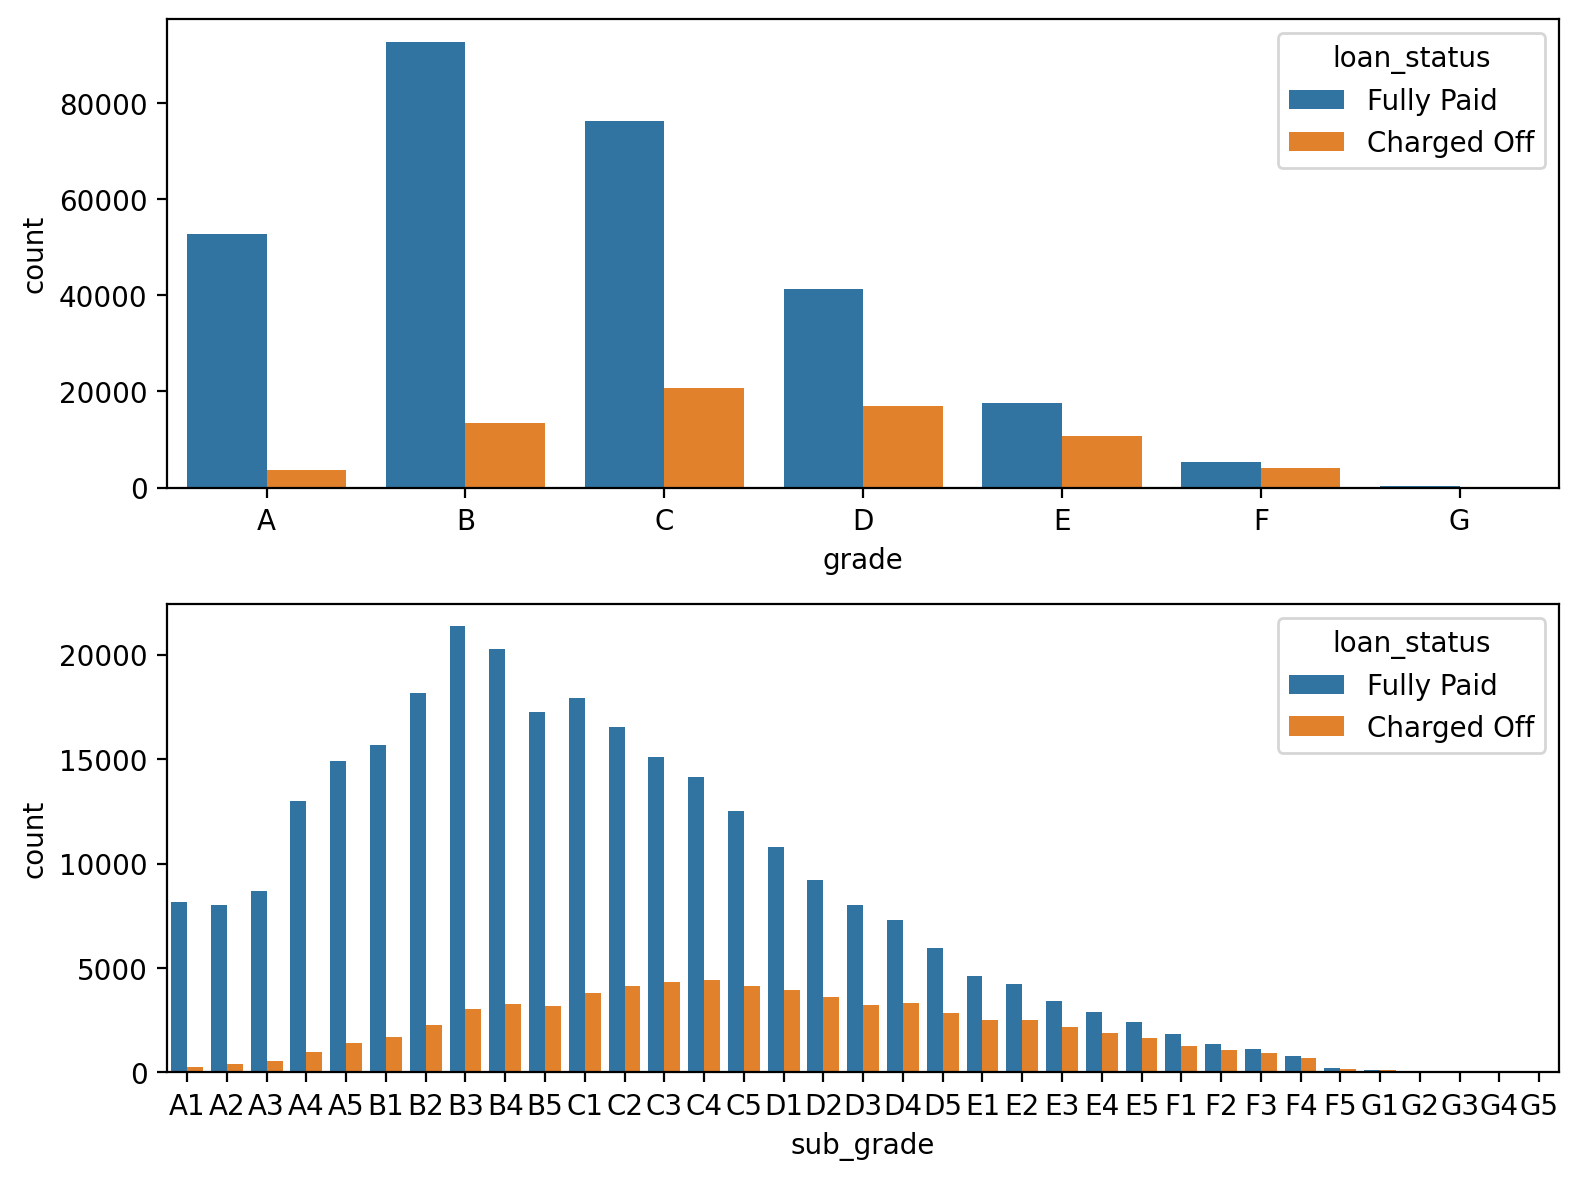

In [53]:
# Count plots of grade and sub_grade
fig,axes=plt.subplots(2,1,figsize=(8,6))
sns.countplot(data=df_merged,x='grade',hue='loan_status',ax=axes[0])
sns.countplot(data=df_merged,x='sub_grade',hue='loan_status',ax=axes[1])
plt.tight_layout()
plt.show()

Observations from the above countplots:

* Most number of people in grade B paid off the loan.
* In Grade B most people in sub_grade B3 have paid off their loans.
* Very less number of people are categorised in G grade.
* The percentage of defaulters in sub_grade A1 is the least, implying genuine people.

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='grade'>

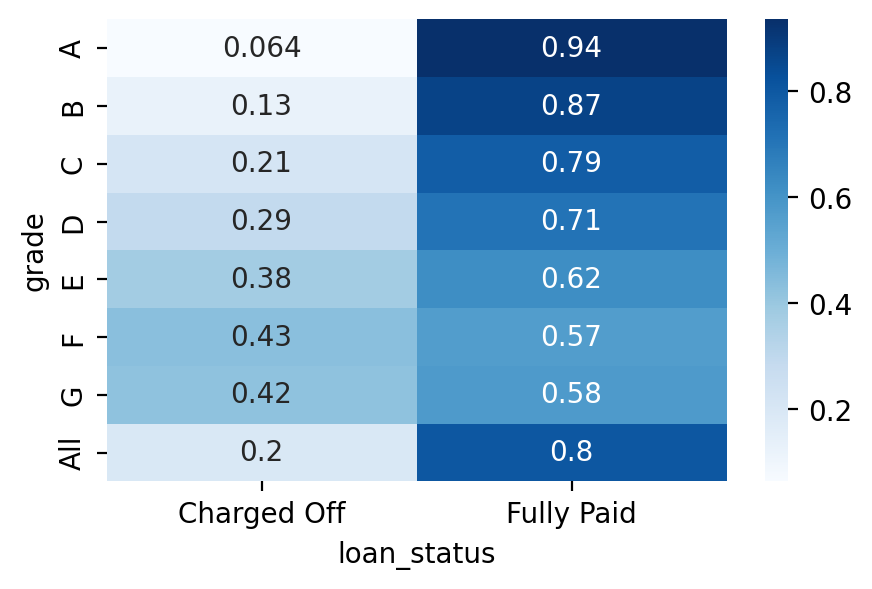

In [54]:
plt.figure(figsize=(5,3))
sns.heatmap(pd.crosstab(df_merged['grade'],df_merged['loan_status'],normalize='index',margins=True),annot=True,
            cmap='Blues')
plt.show()

<Figure size 500x600 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='sub_grade'>

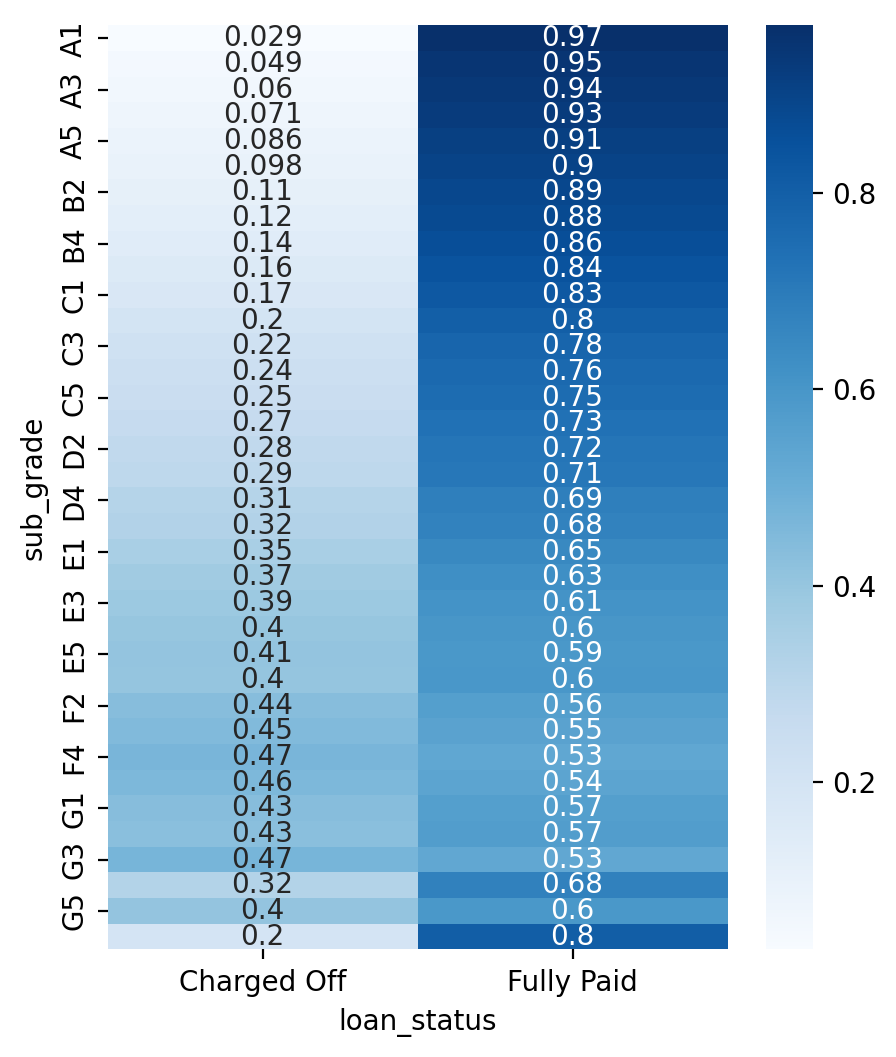

In [55]:
plt.figure(figsize=(5,6))
sns.heatmap(pd.crosstab(df_merged['sub_grade'],df_merged['loan_status'],normalize='index',margins=True),annot=True,
            cmap='Blues')
plt.show()

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='home_ownership'>

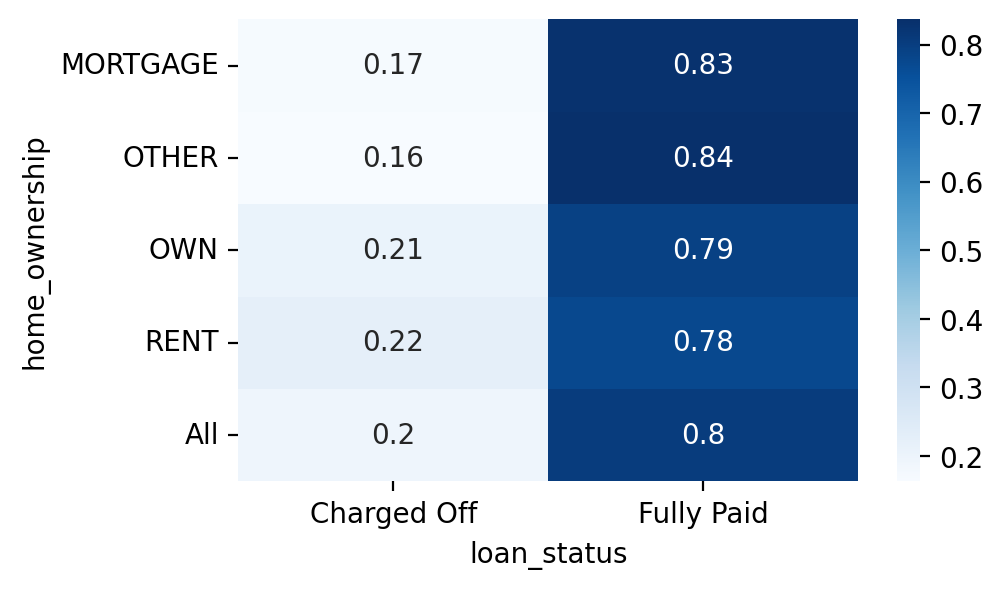

In [56]:
plt.figure(figsize=(5,3))
sns.heatmap(pd.crosstab(df_merged['home_ownership'],df_merged['loan_status'],normalize='index',margins=True),annot=True,
            cmap='Blues')
plt.show()

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='purpose'>

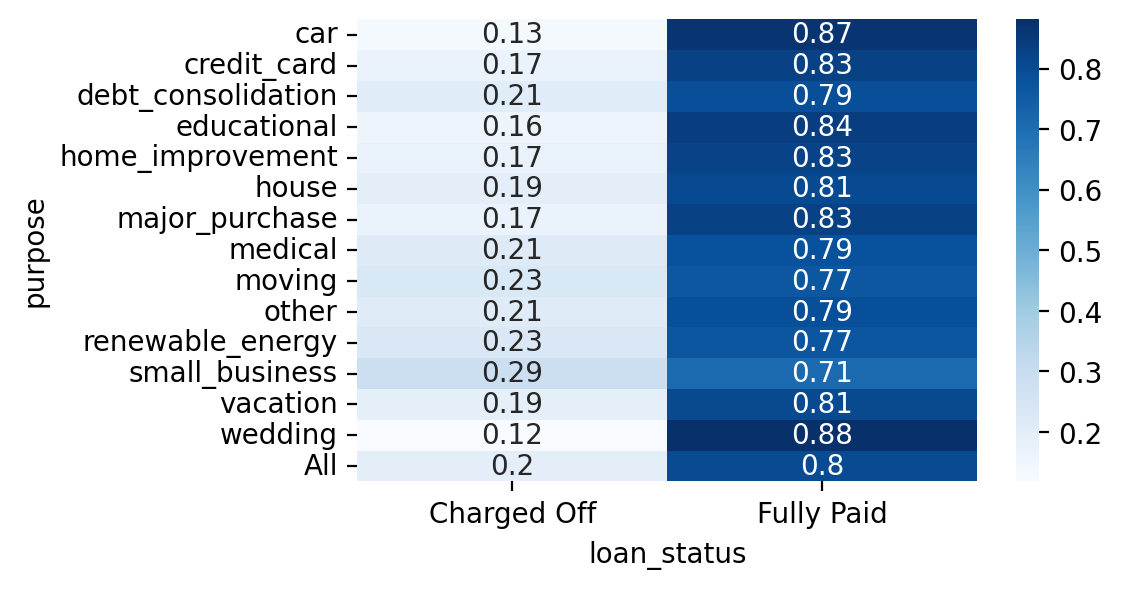

In [57]:
plt.figure(figsize=(5,3))
sns.heatmap(pd.crosstab(df_merged['purpose'],df_merged['loan_status'],normalize='index',margins=True),annot=True,
            cmap='Blues')
plt.show()

Observations from the above heatmaps:

* 94% of people marked in grade A paid back the loan.
* The customers who have opted for joint loans are more likely to pay back.
* The people who have taken loans for Wedding, Car and educational purposes are most likely to pay back the loan.
* People who have taken loan for small business are least likely to pay back the loan.

### Feature Engineering

In [58]:
# Loan status
map={'Charged Off':1,'Fully Paid':0}
df_merged['loan_status']=df_merged['loan_status'].map(map)

In [59]:
# Initial_list_status
map={'w':0,'f':1}
df_merged['initial_list_status']=df_merged['initial_list_status'].map(map)

In [60]:
X = df_merged.drop(columns=['loan_status'])
y = df_merged['loan_status']

In [61]:
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
X_train,X_test_cv,y_train,y_test_cv = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [62]:
# Target encoding of categorical columns (I have included zip code, year and month as they also have limited categorical values and are not continous with more number of values)
encoding_cols = ['grade','sub_grade','home_ownership','verification_status','purpose',
                'application_type','zipcode']
# Target encoding should only be applied to category or object dtypes, it won't work on continuous data type like int or float.
# In our dataset zipcode is an object and not int or float.

from category_encoders import TargetEncoder

encoder=TargetEncoder()

for i in encoding_cols:
    X_train[i]=encoder.fit_transform(X_train[i],y_train)
    X_test_cv[i]=encoder.transform(X_test_cv[i])
    X_test[i]=encoder.transform(X_test[i])

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
# MinMax scaler for numerical columns
numeric_cols = ['loan_amnt','term','int_rate','emp_length','annual_inc','dti','open_acc',
               'pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies',
               'issue_year','issue_month','earliest_cr_year','earliest_cr_month']

minmax = MinMaxScaler()

In [ ]:
X_train_scaled = minmax.fit_transform(X_train[numeric_cols])
X_test_cv_scaled=minmax.transform(X_test_cv[numeric_cols])
X_test_scaled=minmax.transform(X_test[numeric_cols])

In [ ]:
X_train[numeric_cols]=X_train_scaled

In [ ]:
X_test_cv[numeric_cols]=X_test_cv_scaled

In [ ]:
X_test[numeric_cols]=X_test_scaled

In [ ]:
display(X_train.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Scaled Final Data"))

### Modelling

In [ ]:
# Let's fit the logistic Regression model and check

model = LogisticRegression(random_state=1,max_iter=500,n_jobs=-1)
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)
print(f" Accuracy score of the {model} = {round(model.score(X_test,y_test)*100,2)}")

The Accuracy of our initial model is 88.68% which seems to be decent, but the catch is accuracy is not the best score when you have imbalanced dataset. Since ours is an imbalanced dataset accuracy can be sometime misleading so we will check some more evaulation metric to see whether we have a good model or not.

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

Observations from classification report and confusion matrix:
* The precision is high for class 0.
* The precision of class 1 (defauter) is also high which is a good thing, high pecision for class 1 means if our model predicts that the customer is a defaulter then there is a 92% chance that the person is a defaulter, this might save the bank from defaulters.
* The recall for class 0 is also very high that means it classifies most of the non defaulers correctly.
* The problematic thing is the recall of class 1, basically recall (tp/(tp+fn)) tells us how well it can catch the defaulters, since recall for class 1 is very low which implies false negative is high, this means though the person is a defaulter our model is classifying him/her into non defaulter, this might be because of 2 reasons:
- a) The data is highly imbalanced and there are more records class 0
- b) We have taken a defalt thereshold of 0.5 currently to classify into class 1 or class 0, which should be changed according to problem statement.

### Evaluation

#### ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

TPR=(TP)/(TP+FN)
False Positive Rate (FPR) is defined as follows:

FPR=(FP)/(FP+TN)
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

In [ ]:
roc_auc_score(y_test,y_pred)
fpr,tpr,thr = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [ ]:
score = roc_auc_score(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The above plot shows us the true positive rate and false positive rates for different thresholds of probabilities.

The higher the area of blue curve the better is our model.

The red dotted line shows a random model which has an roc_auc_score of 0.5.

The threshold is chosen based on optimum value of tpr and fpr according to the business problem being solved.

#### Precision Recall curve

In [ ]:
precision,recall,thr = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

In [ ]:
# Precision and recall will have one extra value.
# The extra value in the precision and recall arrays ensures that all relevant decision thresholds are covered, including the boundary cases where the number of predicted positive samples is either zero or equal to the total number of samples.
len(thr)
len(precision)
len(recall)

In [ ]:
plt.figure()
plt.plot(thr,precision[0:len(thr)],linestyle='--',label='precision',color='blue')
plt.plot(thr,recall[0:len(thr)],label='recall',color='orange')
plt.title("Precision-recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision and Recall values")
plt.grid()
plt.show()

The above curve shows us precision and recall values for different thresholds, since both precision and recall are important in our business problem we have to consider a value of 0.3 for the threshold, this means if a model predicts the probability for any person to be more than 0.3 then he/she should be classified as defaulter.

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

threshold_considered = 0.3

y_pred_custom = (y_pred>threshold_considered).astype('int')
y_pred_custom

In [ ]:
print(classification_report(y_test,y_pred_custom))

In [ ]:
confusion_matrix(y_test,y_pred_custom)

In [ ]:
# Let's do multicollinearity check and remove some features which have high VIF and refit the model

#### Multicollinearity check with VIF

* Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

* Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF. In VIF method, we pick each independent feature and regress it against all of the other independent features. VIF score of an independent variable represents how well the variable is explained by other independent variables.

* VIF = 1/1-R2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X_train)

Let's remove the top most vif feature and re-calculate the vif

In [ ]:
removed_features =[]
removed_features.append('application_type')
X_train.drop(columns=['application_type'],inplace=True)

In [ ]:
calc_vif(X_train)

Since the VIF is very high we can remove 3-4 features at once and can check for VIF again

In [ ]:
removed_features.extend(['sub_grade','grade','int_rate','purpose'])
X_train.drop(columns=['sub_grade','grade','int_rate','purpose'],inplace=True)

In [ ]:
calc_vif(X_train)

In [ ]:
removed_features.extend(['home_ownership','earliest_cr_year','verification_status','issue_year'])
X_train.drop(columns=['home_ownership','earliest_cr_year','verification_status','issue_year'],inplace=True)

In [ ]:
calc_vif(X_train)

In [ ]:
# Now with these features let's refit the model
removed_features
X_test.drop(columns=removed_features,inplace=True)

In [ ]:
X_test_cv.drop(columns=removed_features,inplace=True)

In [ ]:
model2 = LogisticRegression(max_iter=1000,solver='liblinear',random_state=1,n_jobs=-1)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
model2.score(X_test,y_test)

In [ ]:
print(classification_report(y_test,model2.predict(X_test)))

In [ ]:
confusion_matrix(y_test,model2.predict(X_test))

#### Oversampling using SMOTE to solve the imbalance issue

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1,n_jobs=-1,k_neighbors=5)

In [ ]:
X_train_new,y_train_new = sm.fit_resample(X_train,y_train)

In [ ]:
print(f"After OverSampling, the shape of train_X:{X_train_new.shape}")
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_new.shape))

print(f"After OverSampling, counts of label '1': {(sum(y_train_new == 1))}")
print(f"After OverSampling, counts of label '0':{np.sum(y_train_new==0)}")

In [ ]:
model3 = LogisticRegression(max_iter=1000,random_state=1,n_jobs=-1,)
model3.fit(X_train_new, y_train_new)
predictions = model3.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

In [ ]:
cm=confusion_matrix(y_test,predictions)

In [ ]:
model3.score(X_test,y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

### Insights and Recommendations

#### Insights
1. **Loan Grade Concentration**: The concentration of loans in the B, C, and A categories suggests these grades are most common and potentially the most reliable segments.
2. **Employment Stability and Loan Purpose**: The long employment duration of many borrowers indicates stability, which is a positive sign for lenders. The primary purpose of loans being debt consolidation reflects a trend towards financial management and restructuring by borrowers.
3. **Correlation Insights**: The high correlation between loan amount and installment (0.95 Pearson, 0.97 Spearman) suggests that these two variables are strongly linked in their behavior. The minimal difference in the pearson and spearman correlation coefficients indicate that there is minimal to no involvement of non linearity in the data due to which did not check for any polynomial features.
4. **Verification Status**: The fact that verification doesn't necessarily guarantee a loan being fully paid implies that other factors play a significant role in loan performance.

#### Recommendations

1. **Tailored Loan Products**: Develop tailored loan products for the most common borrower segments (B, C, and A grade borrowers) to enhance product-market fit.
2. **Loan Term Structuring**: Offer more flexible terms for higher-grade loans and consider stricter terms for longer-term and lower-grade loans to mitigate risk.
3. **Further Statistical Analysis**: Conduct further statistical tests to validate the significance of observed correlations and insights, ensuring that lending strategies are data-driven.
4. **Monitoring and Adjustment of Models**: Continuously monitor and adjust credit scoring models in response to changes in borrower behavior and economic conditions.